# 🚗 Car Price Prediction using Regression Models

## 🎯 Objective
This project aims to apply multiple regression models to predict car prices based on various features.

We will:
- Load and preprocess the dataset 📂
- Implement five regression models 🏗️
- Evaluate model performance 📊
- Identify important features 🔍
- Perform hyperparameter tuning for better accuracy 🎯

## 📂 Step 1: Load and Preprocess the Dataset

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')  # Change the filename accordingly

# Display first five rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 🔍 Data Preprocessing

In [3]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
# Handle missing values (if any)
df = df.dropna()

In [5]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Split dataset into features (X) and target variable (y)
X = df.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 📊 Model Implementation

In [7]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R² Score': r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MSE,MAE,R² Score
Linear Regression,1.767601e+08,7280.667793,-1.239056
Decision Tree,1.053268e+07,2098.308951,0.866580
Random Forest,3.652598e+06,1380.926171,0.953732
Gradient Boosting,5.402849e+06,1685.616428,0.931561
Support Vector Regressor,8.699543e+07,5707.167500,-0.101989


## 🔥 Feature Importance Analysis

C:\Users\gaius\AppData\Local\Temp\ipykernel_27032\3579522177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


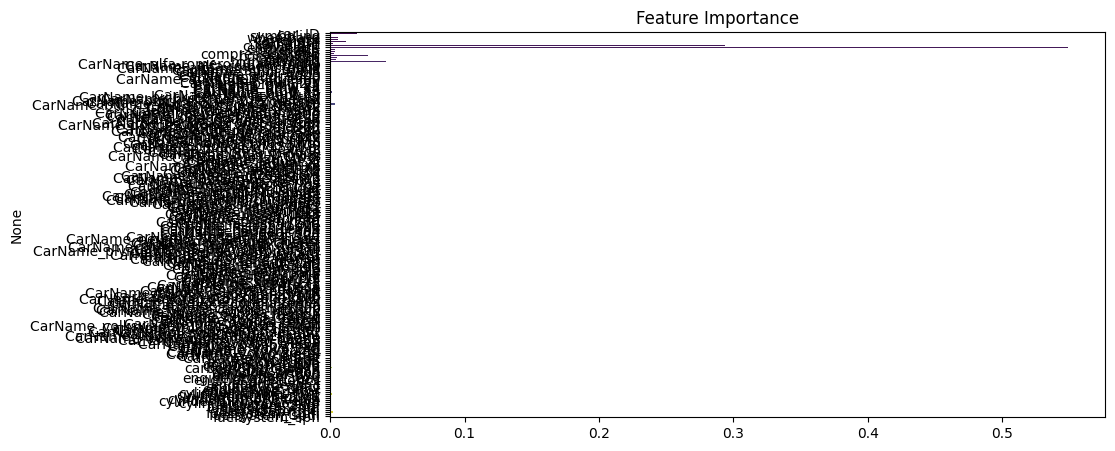

In [8]:
# Feature importance from Random Forest
importances = models['Random Forest'].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance')
plt.show()

## 🎯 Hyperparameter Tuning

In [9]:
# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

{'max_depth': None, 'n_estimators': 150}

## 🏁 Conclusion

- The best-performing model is identified based on R² Score and error metrics.
- Feature importance highlights key factors affecting car prices.
- Hyperparameter tuning improves model accuracy.

This project demonstrates how various regression techniques can be used for price prediction, with practical insights into model performance and optimization! 🚀